# **Cantidad pedida**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_varios_periodos")
data

,x,p,α,r,c,h,D_max,nivel_optimo,cantidad_pedido
0,10,3,0.8,2,1,0.1,10,13.714286,Pedir
1,1,67,0.6,6,44,0.3,39,3.469154,Pedir
2,8,85,0.7,16,29,0.5,18,12.538206,Pedir
3,7,87,0.8,20,24,0.5,45,39.245902,Pedir
4,4,54,0.3,22,49,0.2,34,9.232759,Pedir
...,...,...,...,...,...,...,...,...,...
95,10,92,0.8,23,51,0.2,18,7.735537,No pedir
96,6,66,0.6,4,55,0.7,27,-6.166911,No pedir
97,4,81,0.4,5,44,0.2,41,12.855107,Pedir
98,9,69,0.8,24,35,0.7,27,17.830872,Pedir


In [ ]:
data.describe()

,x,p,α,r,c,h,D_max,nivel_optimo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.590000,63.480000,0.557000,18.310000,40.970000,0.421000,29.800000,10.766950
std,3.088248,20.996623,0.170712,17.195662,12.940778,0.227989,12.398273,13.181337
min,1.000000,3.000000,0.300000,2.000000,1.000000,0.100000,10.000000,-44.074074
25%,5.000000,47.750000,0.400000,8.750000,30.750000,0.200000,18.000000,3.317382
50%,8.000000,59.500000,0.600000,13.500000,42.000000,0.400000,30.000000,9.507723
75%,10.000000,83.000000,0.700000,22.000000,52.000000,0.600000,39.250000,18.367522
max,13.000000,100.000000,0.800000,91.000000,88.000000,0.800000,50.000000,49.628844


In [ ]:
data["cantidad_pedido"].value_counts()

,count
cantidad_pedido,
Pedir,56
No pedir,44


In [ ]:
data["cantidad_pedido"].unique()

array(['Pedir', 'No pedir'], dtype=object)

In [ ]:
Nopedir = {value: key for key,value in enumerate(data["cantidad_pedido"].unique())}

In [ ]:
data["cantidad_pedido"] = data["cantidad_pedido"].map(Nopedir)

In [ ]:
gender_label = {value: key for key,value in enumerate(data["cantidad_pedido"].unique())}
data["cantidad_pedido"] = data["cantidad_pedido"].map(gender_label)
data

,x,p,α,r,c,h,D_max,nivel_optimo,cantidad_pedido
0,10,3,0.8,2,1,0.1,10,13.714286,0
1,1,67,0.6,6,44,0.3,39,3.469154,0
2,8,85,0.7,16,29,0.5,18,12.538206,0
3,7,87,0.8,20,24,0.5,45,39.245902,0
4,4,54,0.3,22,49,0.2,34,9.232759,0
...,...,...,...,...,...,...,...,...,...
95,10,92,0.8,23,51,0.2,18,7.735537,1
96,6,66,0.6,4,55,0.7,27,-6.166911,1
97,4,81,0.4,5,44,0.2,41,12.855107,0
98,9,69,0.8,24,35,0.7,27,17.830872,0


In [ ]:
data["cantidad_pedido"].value_counts()

,count
cantidad_pedido,
0,56
1,44


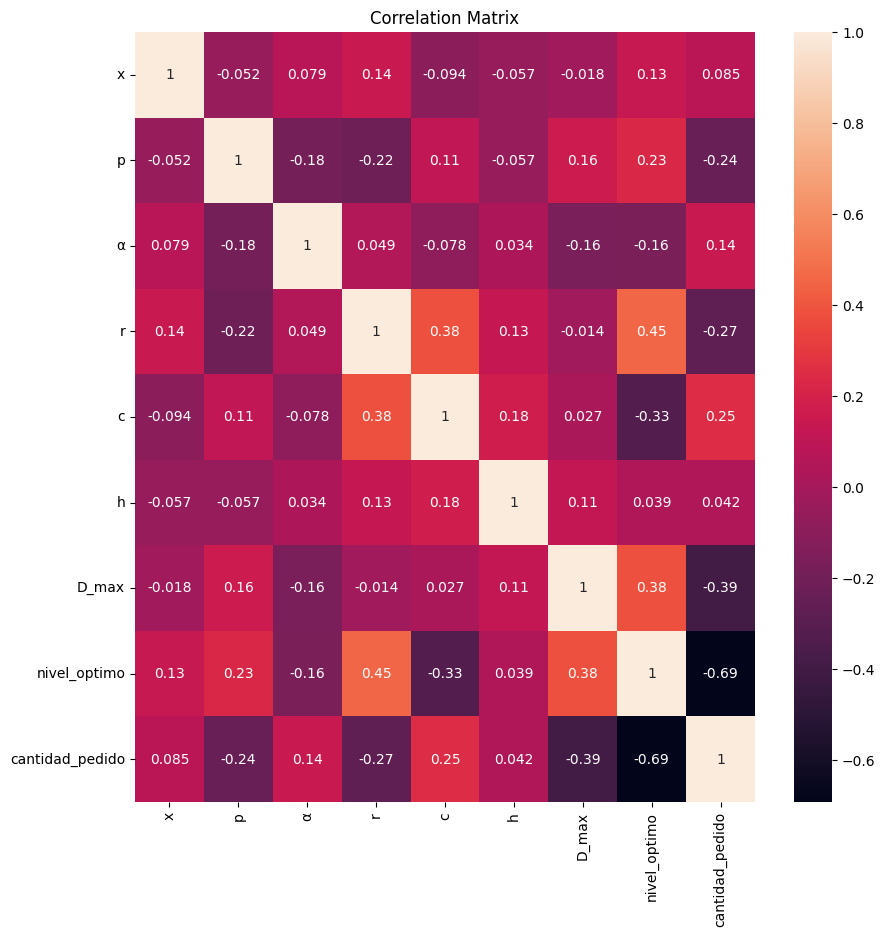

In [ ]:
import seaborn as sns
plt.style.use("default")
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
features = np.asarray([data["x"],
                      data["p"],
                      data["α"],
                      data["r"],
                      data["c"],
                      data["h"],
                      data["D_max"],
                       data["nivel_optimo"]])

features = features.T
features

array([[ 10.        ,   3.        ,   0.8       ,   2.        ,
          1.        ,   0.1       ,  10.        ,  13.71428571],
       [  1.        ,  67.        ,   0.6       ,   6.        ,
         44.        ,   0.3       ,  39.        ,   3.46915352],
       [  8.        ,  85.        ,   0.7       ,  16.        ,
         29.        ,   0.5       ,  18.        ,  12.53820598],
       [  7.        ,  87.        ,   0.8       ,  20.        ,
         24.        ,   0.5       ,  45.        ,  39.24590164],
       [  4.        ,  54.        ,   0.3       ,  22.        ,
         49.        ,   0.2       ,  34.        ,   9.23275862],
       [ 11.        ,  41.        ,   0.3       ,  45.        ,
         46.        ,   0.4       ,  50.        ,  27.22908093],
       [  8.        ,  55.        ,   0.6       ,   6.        ,
         30.        ,   0.6       ,  10.        ,   2.86206897],
       [ 11.        ,  31.        ,   0.3       ,  21.        ,
         38.        ,   0.1      

In [ ]:
targets = np.asarray(data["cantidad_pedido"])

features.shape,targets.shape

((100, 8), (100,))

In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,random_state = 60,test_size=0.2)
train_features.shape,test_features.shape

((80, 8), (20, 8))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.fit_transform(test_features)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

d_tree = DecisionTreeClassifier(max_depth=5)

d_tree

DecisionTreeClassifier(max_depth=5)

In [ ]:
d_tree.fit(train_features,train_targets)

DecisionTreeClassifier(max_depth=5)

In [ ]:
predictions = d_tree.predict(test_features)

In [ ]:
print(classification_report(test_targets,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
accuracy_score(test_targets,predictions)

0.9

In [ ]:
np.median(np.abs(predictions-test_targets))

0.0

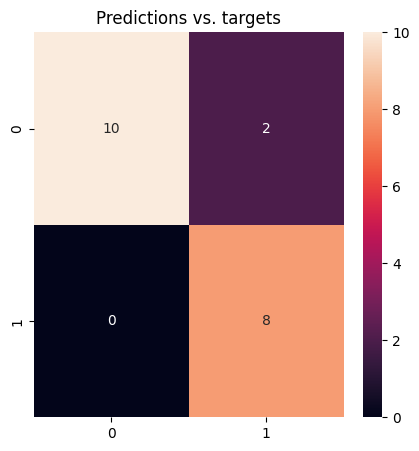

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(test_targets,predictions),annot=True)
plt.title("Predictions vs. targets")
plt.show()

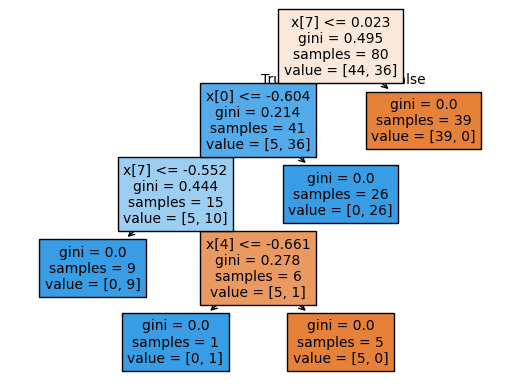

In [ ]:
from sklearn import tree
fig = plt.figure()
_ = tree.plot_tree(d_tree,filled = True)

In [ ]:
predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
test_features

array([[-0.10216855, -1.36110528,  1.30072282, -0.17653565, -0.45028818,
         0.85125248, -1.28768675, -0.78057227],
       [-1.73686541, -0.45032851, -2.03446391, -0.00430575,  0.93521392,
        -1.33144618,  0.28615261, -0.35775594],
       [ 0.30650566, -0.04553884,  1.30072282,  0.12486668, -0.88325759,
         1.28779221, -1.28768675, -0.30710848],
       [-1.73686541,  0.51104697, -0.70038921, -0.43488049,  0.41565063,
        -0.02182699, -0.14307631, -0.35126647],
       [ 0.30650566,  1.27002761, -1.36742656, -0.69322534, -0.96985147,
        -1.76798591, -1.43076305, -0.54115595],
       [-0.51084277,  1.2194289 ,  1.30072282, -0.0904207 , -1.22963312,
        -0.02182699,  1.07307229,  1.57881082],
       [ 0.71517988, -1.61409883, -0.03335187,  2.83748758,  0.41565063,
         0.41471274,  0.        ,  2.03122593],
       [-0.91951698,  1.01703406, -0.70038921, -0.04736322, -0.88325759,
         0.85125248,  1.00153414,  1.2315569 ],
       [-0.91951698,  1.42182374

In [ ]:
nuevo = d_tree.predict(sc.fit_transform(np.array([[ 1,	67,	0.6,	6,	44,	0.3,	39,	3.469154 ]])))

In [ ]:
nuevo

array([1])